In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_json("C:\\Users\\thena\\OneDrive\\Desktop\\BeCode\\virtual-env\\nlp_proj\\data\\kone_classification.json")
df.head()

,text,label,culture,document_id,annotation_id,source
0,"Eclairage de la gaine , à compléter rappel : 2",SH16,fr-fr,62baee150c69f839d30f8f65,62b2f92cc0979ee09ccce7ab,TRAINING
1,Contacten elektrische motor van de deurkooiope...,CAR06,nl-nl,61c32860a4661f0482909b48,628cf0e291fca41ccdd01599,WORKFLOW
2,"Les zone de porte ne fonctionne pas , y remédier",CD06,fr-fr,62ac68067852a3302e3c52a1,62ac68437852a30ec93c53cd,WORKFLOW
3,Enlever les autocollants STALIFT,OTHER,fr-fr,624444fbb81db03e43beb09f,626a81e78e6b09e818279c6c,WORKFLOW
4,Le boitier métallique sur le toit de cabine es...,CAR23,fr-fr,62b1beee0e2b73b9d964e1e5,62b1bddbcb5dabb0b76331e9,TRAINING


In [3]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 524
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           395 non-null    object
 1   label          395 non-null    object
 2   culture        395 non-null    object
 3   document_id    395 non-null    object
 4   annotation_id  395 non-null    object
 5   source         395 non-null    object
dtypes: object(6)
memory usage: 21.6+ KB


In [4]:
df.label.nunique()

56

In [5]:
df = df[df['source'] == 'TRAINING']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 524
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           186 non-null    object
 1   label          186 non-null    object
 2   culture        186 non-null    object
 3   document_id    186 non-null    object
 4   annotation_id  186 non-null    object
 5   source         186 non-null    object
dtypes: object(6)
memory usage: 10.2+ KB


In [7]:
df = df[['text', 'label']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 524
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    186 non-null    object
 1   label   186 non-null    object
dtypes: object(2)
memory usage: 4.4+ KB


In [8]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 523
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    167 non-null    object
 1   label   167 non-null    object
dtypes: object(2)
memory usage: 3.9+ KB


In [9]:
df['text'].nunique()

164

In [10]:
df['label'].nunique()

51

In [11]:
df_grp =df.groupby('text').count()

In [12]:
df_rep = df_grp[df_grp['label']!=1]
df_rep

,label
text,
"Eclairage de la gaine , à compléter rappel : 2",2
La vitre de la boîte à clé est absente .,2
Plaque d ' identification n ' est pas complète ou n ' est pas correcte : charge maximale et / ou nombre des personnes maximale et / ou numéro d ' identification et / ou nom du service d ' entretien et / ou nom du responsable,2


In [13]:
# remove the text with incorrect label
df.drop(df[(df['text']==df_rep.index[0]) & (df['label'] == 'CAR06')].index, inplace=True)
df.drop(df[(df['text']==df_rep.index[1]) & (df['label'] == 'CAR19')].index, inplace=True)
df.drop(df[(df['text']==df_rep.index[2]) & (df['label'] == 'CAR04')].index, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 523
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    164 non-null    object
 1   label   164 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


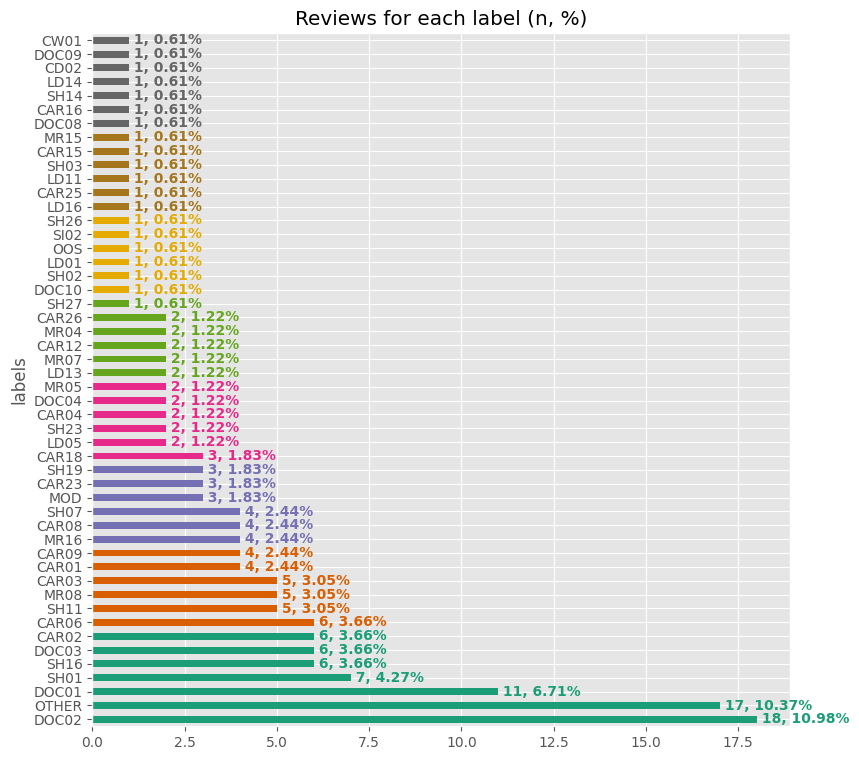

In [15]:
plt.style.use('ggplot')

num_classes = len(df["label"].value_counts())

colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))
iter_color = iter(colors)

df['label'].value_counts().plot.barh(title="Reviews for each label (n, %)", 
                                                 ylabel="labels",
                                                 color=colors,
                                                 figsize=(9,9))

for i, v in enumerate(df['label'].value_counts()):
    c = next(iter_color)
    plt.text(v, i,
           " "+str(v)+", "+str(round(v*100/df.shape[0],2))+"%", 
           color=c, 
           va='center', 
           fontweight='bold')

In [16]:
# add a flag to denote the original data
df['translated'] = 0
df.head()

,text,label,translated
0,"Eclairage de la gaine , à compléter rappel : 2",SH16,0
4,Le boitier métallique sur le toit de cabine es...,CAR23,0
5,Plaque d ' identification n ' est pas complète...,CAR26,0
6,Le bon fonctionnement du système appel de seco...,CAR01,0
8,Les données du propriétaire sont à placer en c...,CAR06,0


In [ ]:
# import googletrans
# from googletrans import Translator
# translator = Translator()
# pd.set_option('max_colwidth', 350)

In [ ]:
# print(googletrans.LANGUAGES)

In [ ]:
# df_final['trans_fr_it_fr'] = df_final['text'].apply(lambda x: translator.translate(translator.translate(x, dest='it').text, dest='fr').text)
# df_final

In [ ]:
# df_final['trans_'] = df_final['text'].apply(lambda x: translator.translate(translator.translate(x, dest='en').text, dest='fr').text)
# df_final

In [ ]:
# df_final = df_final.rename(columns = {'new_text':'trans_fr_en_fr'}) 

In [ ]:
#df_final.to_csv("C:\\Users\\thena\\OneDrive\\Desktop\\BeCode\\virtual-env\\nlp_proj\\data\\data_trans_en_it.csv")

In [23]:
df_en_it = pd.read_csv("C:\\Users\\thena\\OneDrive\\Desktop\\BeCode\\virtual-env\\nlp_proj\\data\\data_trans_en_it.csv")
df_en_it.drop(columns='Unnamed: 0', inplace=True)
df_en_it['translated_en'] = 1
df_en_it['translated_it'] = 2
df_en_it.head()

,text,label,trans_fr_en_fr,trans_fr_it_fr,translated_en,translated_it
0,Le boitier métallique sur le toit de cabine es...,CAR23,La boîte en métal sur le toit de la cabine doi...,La boîte en métal sur le toit de la cabine doi...,1,2
1,Le bon fonctionnement du système appel de seco...,CAR01,Le bon fonctionnement du système d'appel de sa...,Le bon fonctionnement du système d'appel de sa...,1,2
2,Les données du propriétaire sont à placer en c...,CAR06,Les données du propriétaire doivent être placé...,Les données du propriétaire doivent être placé...,1,2
3,Le test parachute ne fonctionne pas ( pas d ' ...,CAR16,Le test de parachute ne fonctionne pas (pas co...,Le test de parachute ne fonctionne pas (pas bl...,1,2
4,Il manque l ' attestation de régularisation da...,DOC01,Le certificat de régularisation est manquant d...,Le certificat de régularisation est manquant d...,1,2


In [31]:
df_en = df_en_it[['trans_fr_en_fr','label','translated_en']]
df_en = df_en.copy()
df_en.rename(columns={"trans_fr_en_fr": "text",'translated_en':'translated'},inplace=True)
df_en.head()

,text,label,translated
0,La boîte en métal sur le toit de la cabine doi...,CAR23,1
1,Le bon fonctionnement du système d'appel de sa...,CAR01,1
2,Les données du propriétaire doivent être placé...,CAR06,1
3,Le test de parachute ne fonctionne pas (pas co...,CAR16,1
4,Le certificat de régularisation est manquant d...,DOC01,1


In [32]:
df_it = df_en_it[['trans_fr_it_fr','label','translated_it']]
df_it = df_it.copy()
df_it.rename(columns={"trans_fr_it_fr": "text",'translated_it':'translated'},inplace=True)
df_it.head()

,text,label,translated
0,La boîte en métal sur le toit de la cabine doi...,CAR23,2
1,Le bon fonctionnement du système d'appel de sa...,CAR01,2
2,Les données du propriétaire doivent être placé...,CAR06,2
3,Le test de parachute ne fonctionne pas (pas bl...,CAR16,2
4,Le certificat de régularisation est manquant d...,DOC01,2


In [28]:
df_es = pd.read_csv('es_fr_es.csv')
df_es.drop(columns='Unnamed: 0', inplace=True)
df_es['translated'] = 3
df_es.head()

,text,label,spanish_trans,translated
0,Le boitier métallique sur le toit de cabine es...,CAR23,La boîte en métal sur le toit de la cabine doi...,3
1,Le bon fonctionnement du système appel de seco...,CAR01,Le bon fonctionnement du système d'appel de sa...,3
2,Les données du propriétaire sont à placer en c...,CAR06,Les données du propriétaire seront placées dan...,3
3,Le test parachute ne fonctionne pas ( pas d ' ...,CAR16,Le test de parachute ne fonctionne pas (il ne ...,3
4,Il manque l ' attestation de régularisation da...,DOC01,Le certificat de régularisation dans les archi...,3


In [33]:
df_es = df_es[['spanish_trans','label','translated']]
df_es.head()

,spanish_trans,label,translated
0,La boîte en métal sur le toit de la cabine doi...,CAR23,3
1,Le bon fonctionnement du système d'appel de sa...,CAR01,3
2,Les données du propriétaire seront placées dan...,CAR06,3
3,Le test de parachute ne fonctionne pas (il ne ...,CAR16,3
4,Le certificat de régularisation dans les archi...,DOC01,3


In [34]:
df_es = df_es.copy()
df_es.rename(columns={"spanish_trans": "text"},inplace=True)
df_es.head()

,text,label,translated
0,La boîte en métal sur le toit de la cabine doi...,CAR23,3
1,Le bon fonctionnement du système d'appel de sa...,CAR01,3
2,Les données du propriétaire seront placées dan...,CAR06,3
3,Le test de parachute ne fonctionne pas (il ne ...,CAR16,3
4,Le certificat de régularisation dans les archi...,DOC01,3


In [21]:
df_cn = pd.read_csv('fr_cn_fr.csv')
df_cn.drop(columns='Unnamed: 0', inplace=True)
df_cn['translated'] = 4
df_cn.head()

,text,label,chinese_trans,translated
0,Le boitier métallique sur le toit de cabine es...,CAR23,La boîte en métal sur le toit de la cabine doi...,4
1,Le bon fonctionnement du système appel de seco...,CAR01,Le fonctionnement approprié du système d'appel...,4
2,Les données du propriétaire sont à placer en c...,CAR06,Les données du propriétaire seront placées dan...,4
3,Le test parachute ne fonctionne pas ( pas d ' ...,CAR16,Le test de parachute ne peut pas fonctionner (...,4
4,Il manque l ' attestation de régularisation da...,DOC01,Manque de certificats réguliers dans les docum...,4


In [37]:
df_cn = df_cn[['chinese_trans','label','translated']]
df_cn = df_cn.copy()
df_cn.rename(columns={"chinese_trans": "text"},inplace=True)
df_cn.head()

,text,label,translated
0,La boîte en métal sur le toit de la cabine doi...,CAR23,4
1,Le fonctionnement approprié du système d'appel...,CAR01,4
2,Les données du propriétaire seront placées dan...,CAR06,4
3,Le test de parachute ne peut pas fonctionner (...,CAR16,4
4,Manque de certificats réguliers dans les docum...,DOC01,4


In [ ]:
# df_merge = pd.merge(df_cn, df_es, on=['text','label'])
# df_merge = pd.merge(df_merge, df_en, on=['text','label'])
# df_merge.head()

In [39]:
#df_trans = df_cn.append(df_es, ignore_index = True)
df_trans = pd.concat([df_en, df_es, df_it, df_cn,], axis=0)
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644 entries, 0 to 160
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        644 non-null    object
 1   label       644 non-null    object
 2   translated  644 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 20.1+ KB


In [40]:
# select only the classes that has samples less than 10
ex_label = ['DOC03', 'CAR06','CAR02', 'SH01', 'DOC01', 'OTHER', 'DOC02']
df_trans = df_trans[~df_trans['label'].isin(ex_label) ]
df_trans.head()

,text,label,translated
0,La boîte en métal sur le toit de la cabine doi...,CAR23,1
1,Le bon fonctionnement du système d'appel de sa...,CAR01,1
3,Le test de parachute ne fonctionne pas (pas co...,CAR16,1
7,"L'éclairage de la gaine est défectueux, pour y...",SH16,1
8,Une corrosion excessive a été trouvée sur les ...,SH11,1


In [42]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 160
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        360 non-null    object
 1   label       360 non-null    object
 2   translated  360 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 11.2+ KB


In [ ]:
# df_org = df_select[['text','label']]
# df_org.head()

In [ ]:
# df_ch = df_select[['chinese_trans','label', 'translated']]
# df_ch.rename(columns={"chinese_trans": "text"},copy=True,inplace=True)

# df_es = df_select[['spanish_trans','label','translated']]
# df_es.rename(columns={"spanish_trans": "text"},copy=True,inplace=True)

# df_en = df_select[['trans_fr_en_fr','label','translated']]
# df_en.rename(columns={"trans_fr_en_fr": "text"},copy=True,inplace=True)

# df_it = df_select[['trans_fr_it_fr','label','translated']]
# df_it.rename(columns={"trans_fr_it_fr": "text"},copy=True,inplace=True)

# df_trans_concat = [df_ch,df_es,df_en,df_it]
# trans_result = pd.concat(df_trans_concat)
# df_drop = trans_result.drop_duplicates()
# trans_result = pd.concat([df_final,df_drop])

In [43]:
# drop duplicates from the translated dataframe
df_trans = df_trans.drop_duplicates()
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 0 to 160
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        356 non-null    object
 1   label       356 non-null    object
 2   translated  356 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 11.1+ KB


In [44]:
# concat the original data with the translated data
trans_result = pd.concat([df,df_trans])
trans_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 160
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        520 non-null    object
 1   label       520 non-null    object
 2   translated  520 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 16.2+ KB


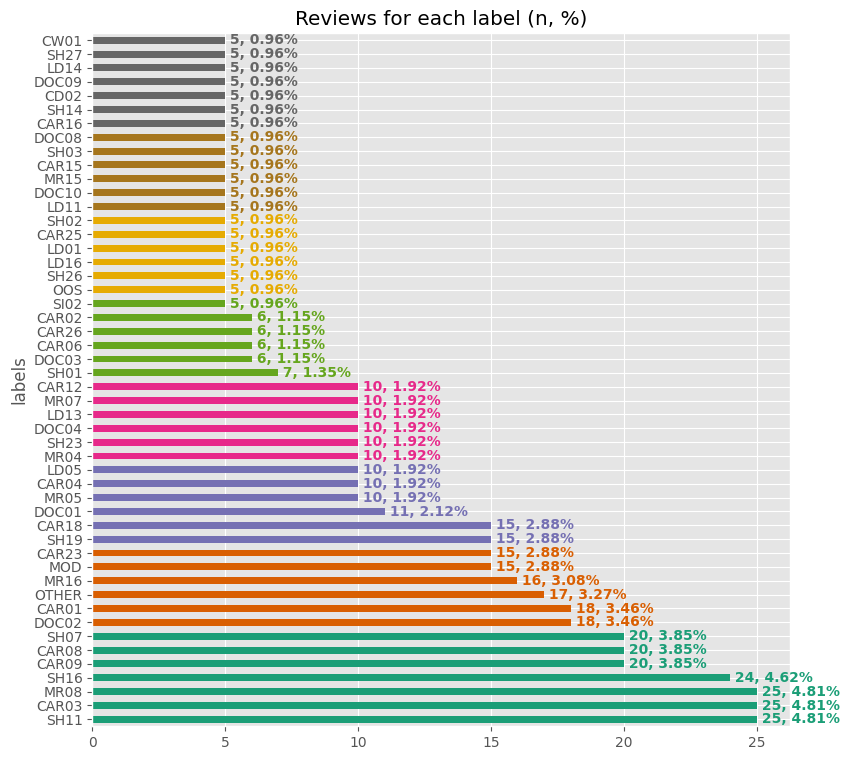

In [46]:
plt.style.use('ggplot')

num_classes = len(trans_result["label"].value_counts())

colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))
iter_color = iter(colors)

trans_result['label'].value_counts().plot.barh(title="Reviews for each label (n, %)", 
                                                 ylabel="labels",
                                                 color=colors,
                                                 figsize=(9,9))

for i, v in enumerate(trans_result['label'].value_counts()):
    c = next(iter_color)
    plt.text(v, i,
           " "+str(v)+", "+str(round(v*100/trans_result.shape[0],2))+"%", 
           color=c, 
           va='center', 
           fontweight='bold')

In [47]:
check_trans_result = trans_result.drop_duplicates()
check_trans_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 160
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        520 non-null    object
 1   label       520 non-null    object
 2   translated  520 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 16.2+ KB


In [51]:
check_trans_result.to_csv('data_after_translation1309.csv', index=False)